In [18]:
%pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv("/home/rizanb/Documents/hob_pred/data/raw/hob_dataset_clean.csv")
df.head()

,chembl_id,smiles,hob,mw,logp,hacc,hdon,tpsa,nrot,mr,num_rings,aromatic_rings,ro5_violations,drug_name,max_phase,measurement_type,original_value,original_units,validation_reason
0,CHEMBL4874698,CC(C)(O)c1cc(F)c2c(c1)C(=O)N(Cc1ccc(Cl)cn1)[C@...,150.0,558.44,4.89,5,2,105.75,8,139.81,5,3,1,NaN,NaN,F,150.0,%,Clear HOB type + PK context
1,CHEMBL4848062,COc1nc(C2=NOC(C3CC3)C(c3ccc(Cl)cc3)N2)ccc1-n1c...,113.0,423.90,4.04,7,1,73.56,5,114.11,5,3,0,NaN,NaN,F,113.0,%,Clear HOB type + PK context
2,CHEMBL2325014,Nc1[nH]ncc1-c1cc(Cl)ccc1Oc1cc(F)c(S(=O)(=O)Nc2...,110.0,500.36,5.15,7,3,122.99,6,117.85,4,4,2,PF-05089771,2.0,F,110.0,%,Clear HOB type + PK context
3,CHEMBL2324776,O=S(=O)(Nc1nncs1)c1cc(Cl)c(Oc2ccc(C(F)(F)F)cc2...,101.0,531.90,5.40,8,1,106.96,6,114.67,4,4,2,NaN,NaN,F,101.0,%,Clear HOB type + PK context
4,CHEMBL1009,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O,100.0,197.19,0.05,4,4,103.78,3,49.09,1,1,0,LEVODOPA,4.0,F,100.0,%,Clear HOB type + PK context


In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.columns

Index(['chembl_id', 'smiles', 'hob', 'mw', 'logp', 'hacc', 'hdon', 'tpsa',
       'nrot', 'mr', 'num_rings', 'aromatic_rings', 'ro5_violations',
       'drug_name', 'max_phase', 'measurement_type', 'original_value',
       'original_units', 'validation_reason'],
      dtype='object')

In [5]:
df["original_units"].unique()

array(['%'], dtype=object)

In [6]:
df["measurement_type"].unique()

array(['F'], dtype=object)

In [7]:
df.describe()

,hob,mw,logp,hacc,hdon,tpsa,nrot,mr,num_rings,aromatic_rings,ro5_violations,max_phase,original_value
count,722.00000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,533.000000,722.00000
mean,58.48633,365.917022,2.578657,5.027701,1.939058,82.572770,5.042936,98.599211,3.045706,1.851801,0.297784,3.697936,58.48633
std,29.47186,159.915040,2.030572,2.939861,1.604138,50.277824,3.527123,42.311503,1.595543,1.158184,0.683647,0.845563,29.47186
min,0.20000,46.070000,-8.160000,1.000000,0.000000,3.240000,0.000000,12.760000,0.000000,0.000000,0.000000,-1.000000,0.20000
25%,33.00000,262.352500,1.452500,3.000000,1.000000,46.990000,3.000000,73.010000,2.000000,1.000000,0.000000,4.000000,33.00000
50%,69.00000,330.750000,2.580000,4.000000,2.000000,72.720000,4.000000,90.120000,3.000000,2.000000,0.000000,4.000000,69.00000
75%,80.00000,431.232500,3.790000,6.000000,3.000000,106.192500,7.000000,114.212500,4.000000,2.000000,0.000000,4.000000,80.00000
max,150.00000,1736.180000,10.810000,28.000000,12.000000,340.120000,27.000000,450.180000,14.000000,6.000000,4.000000,4.000000,150.00000


## Check missing values

In [9]:
df.isna().sum()

chembl_id              0
smiles                 0
hob                    0
mw                     0
logp                   0
hacc                   0
hdon                   0
tpsa                   0
nrot                   0
mr                     0
num_rings              0
aromatic_rings         0
ro5_violations         0
drug_name            114
max_phase            189
measurement_type       0
original_value         0
original_units         0
validation_reason      0
dtype: int64

In [10]:
df.isnull().sum()

chembl_id              0
smiles                 0
hob                    0
mw                     0
logp                   0
hacc                   0
hdon                   0
tpsa                   0
nrot                   0
mr                     0
num_rings              0
aromatic_rings         0
ro5_violations         0
drug_name            114
max_phase            189
measurement_type       0
original_value         0
original_units         0
validation_reason      0
dtype: int64

## check correlation

In [12]:
numeric_features = ['hob', 'mw', 'logp', 'hacc', 'hdon', 'tpsa', 'nrot', 'mr', 
                   'num_rings', 'aromatic_rings', 'ro5_violations', 'max_phase']

df_corr = df[numeric_features].copy()

In [13]:
print(df_corr.isnull().sum())
print("\nDataset shape:", df_corr.shape)

hob                 0
mw                  0
logp                0
hacc                0
hdon                0
tpsa                0
nrot                0
mr                  0
num_rings           0
aromatic_rings      0
ro5_violations      0
max_phase         189
dtype: int64

Dataset shape: (722, 12)


In [21]:
correlation_matrix = df_corr.corr()
correlation_matrix

,hob,mw,logp,hacc,hdon,tpsa,nrot,mr,num_rings,aromatic_rings,ro5_violations,max_phase
hob,1.000000,-0.215341,-0.040196,-0.181947,-0.205168,-0.187421,-0.231734,-0.226077,-0.107213,0.010469,-0.155884,0.093313
mw,-0.215341,1.000000,0.451259,0.751167,0.390912,0.681521,0.619517,0.982409,0.714460,0.352061,0.787830,0.009590
logp,-0.040196,0.451259,1.000000,-0.091660,-0.330871,-0.232903,0.321311,0.543459,0.453502,0.453328,0.352316,0.005484
hacc,-0.181947,0.751167,-0.091660,1.000000,0.518564,0.862379,0.394469,0.675534,0.484653,0.155590,0.629393,0.033774
hdon,-0.205168,0.390912,-0.330871,0.518564,1.000000,0.770406,0.311783,0.335994,0.106217,-0.060857,0.433925,-0.029012
tpsa,-0.187421,0.681521,-0.232903,0.862379,0.770406,1.000000,0.408436,0.596066,0.349617,0.125910,0.589569,0.012013
nrot,-0.231734,0.619517,0.321311,0.394469,0.311783,0.408436,1.000000,0.645387,0.149495,0.260275,0.480727,-0.077604
mr,-0.226077,0.982409,0.543459,0.675534,0.335994,0.596066,0.645387,1.000000,0.720674,0.398990,0.770026,0.004387
num_rings,-0.107213,0.714460,0.453502,0.484653,0.106217,0.349617,0.149495,0.720674,1.000000,0.526803,0.511372,0.031211
aromatic_rings,0.010469,0.352061,0.453328,0.155590,-0.060857,0.125910,0.260275,0.398990,0.526803,1.000000,0.248498,-0.055295


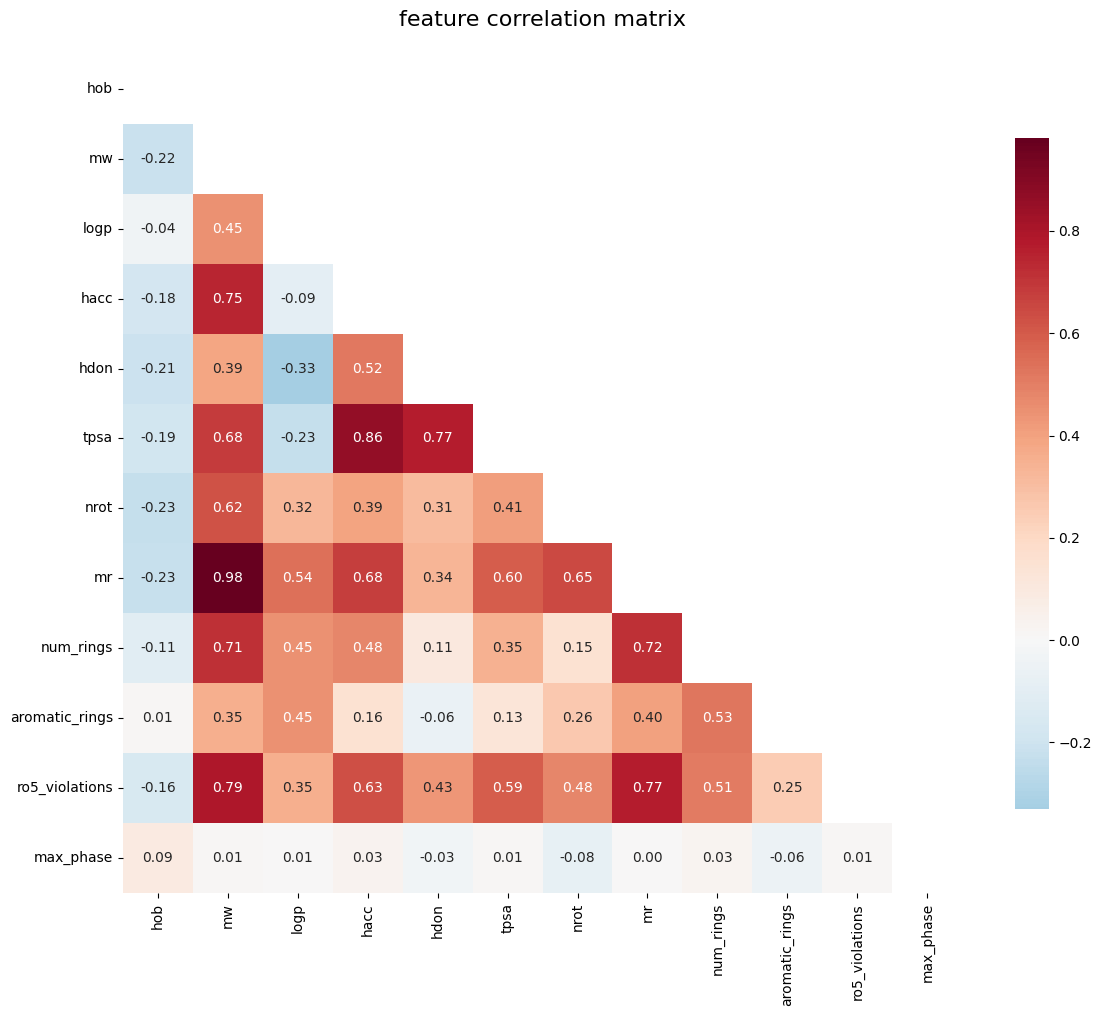

In [20]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('feature correlation matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [23]:
df.head()

,chembl_id,smiles,hob,mw,logp,hacc,hdon,tpsa,nrot,mr,num_rings,aromatic_rings,ro5_violations,drug_name,max_phase,measurement_type,original_value,original_units,validation_reason
0,CHEMBL4874698,CC(C)(O)c1cc(F)c2c(c1)C(=O)N(Cc1ccc(Cl)cn1)[C@...,150.0,558.44,4.89,5,2,105.75,8,139.81,5,3,1,NaN,NaN,F,150.0,%,Clear HOB type + PK context
1,CHEMBL4848062,COc1nc(C2=NOC(C3CC3)C(c3ccc(Cl)cc3)N2)ccc1-n1c...,113.0,423.90,4.04,7,1,73.56,5,114.11,5,3,0,NaN,NaN,F,113.0,%,Clear HOB type + PK context
2,CHEMBL2325014,Nc1[nH]ncc1-c1cc(Cl)ccc1Oc1cc(F)c(S(=O)(=O)Nc2...,110.0,500.36,5.15,7,3,122.99,6,117.85,4,4,2,PF-05089771,2.0,F,110.0,%,Clear HOB type + PK context
3,CHEMBL2324776,O=S(=O)(Nc1nncs1)c1cc(Cl)c(Oc2ccc(C(F)(F)F)cc2...,101.0,531.90,5.40,8,1,106.96,6,114.67,4,4,2,NaN,NaN,F,101.0,%,Clear HOB type + PK context
4,CHEMBL1009,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O,100.0,197.19,0.05,4,4,103.78,3,49.09,1,1,0,LEVODOPA,4.0,F,100.0,%,Clear HOB type + PK context


In [35]:
X = df.drop(columns=["hob", "validation_reason", "original_units", "original_value", "measurement_type", "max_phase", "drug_name", "smiles", "chembl_id"])
X.head()

,mw,logp,hacc,hdon,tpsa,nrot,mr,num_rings,aromatic_rings,ro5_violations
0,558.44,4.89,5,2,105.75,8,139.81,5,3,1
1,423.90,4.04,7,1,73.56,5,114.11,5,3,0
2,500.36,5.15,7,3,122.99,6,117.85,4,4,2
3,531.90,5.40,8,1,106.96,6,114.67,4,4,2
4,197.19,0.05,4,4,103.78,3,49.09,1,1,0


In [37]:
y = df["hob"]

In [38]:
y.head()

0    150.0
1    113.0
2    110.0
3    101.0
4    100.0
Name: hob, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(577, 10) (145, 10) (577,) (145,)


## fit & transform scaler on training data, only transform on test data 

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [42]:
import joblib

joblib.dump(X_train_scaled, '/home/rizanb/Documents/hob_pred/data/processed/2/X_train_scaled.joblib')
joblib.dump(X_test_scaled, '/home/rizanb/Documents/hob_pred/data/processed/2/X_test_scaled.joblib')
joblib.dump(y_train, '/home/rizanb/Documents/hob_pred/data/processed/2/y_train.joblib')
joblib.dump(y_test, '/home/rizanb/Documents/hob_pred/data/processed/2/y_test.joblib')


['/home/rizanb/Documents/hob_pred/data/processed/2/y_test.joblib']

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)

print(f"accuracy of linear regression: {accuracy:.3f}")

accuracy of linear regression: 0.101


In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
print(f"R² score (Random Forest): {model.score(X_test_scaled, y_test):.3f}")


R² score (Random Forest): 0.237


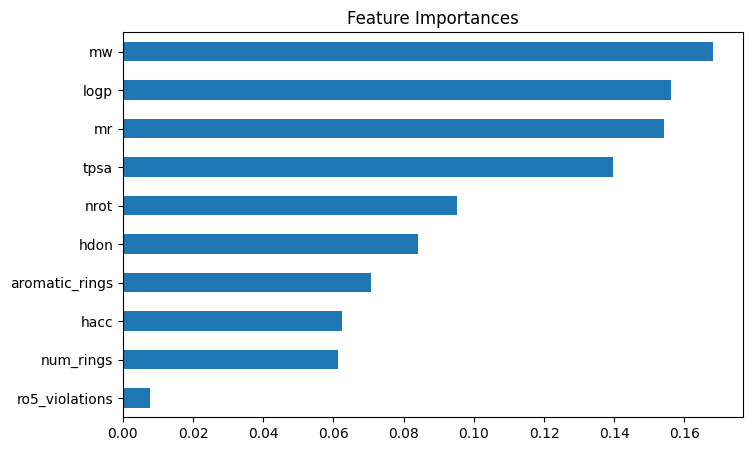

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

pd.Series(importances, index=features).sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importances")
plt.show()


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

print(f"R² score (Gradient Boosting): {gb_model.score(X_test_scaled, y_test):.3f}")


R² score (Gradient Boosting): 0.237
